# **Youtube Trending Videos Prediction**
Created by:
* Livander Surya (2201796384)
* Muhammad Erizky S. (2201797052)


# **Machine Learning**

In [1]:
import os
import glob
from datetime import datetime
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split



## **Combining multiple small dataset**

In [2]:
path = r'/content/data'
all_files = sorted(glob.glob(os.path.join(path, "*.csv")), key=lambda day: datetime.strptime(day, "/content/data/%y.%d.%m_ID_videos.csv"))
df0 = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
df0

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3p7s7Rjh4fg,NCT U 엔시티 유 'From Home' MV,2020-10-19T09:00:15Z,UCEf_Bc-KVd7onSeifS3py9g,SMTOWN,10,20.24.10,[none],19747976,1319561,10648,281951,https://i.ytimg.com/vi/3p7s7Rjh4fg/default.jpg,False,False,NCT's 2nd album NCT - The 2nd Album RESONANCE ...
1,6ldgr3RRLVc,HARTA TAHTA CHEF RENATTA - ARNOLD POE,2020-10-19T08:30:11Z,UCr5k1iu1hF_01O1AD1JzcFA,Arnold Poernomo,24,20.24.10,Arnold Poernomo|Chef Arnold|Cooking|Master Che...,5756278,296553,4942,25969,https://i.ytimg.com/vi/6ldgr3RRLVc/default.jpg,False,False,kalo kemarin kita sudah ngobrol bareng Juri Ma...
2,5gLe94rL77Y,AYU TING TING - TATITUT (OFFICIAL MUSIC VIDEO),2020-10-21T03:00:10Z,UCxNTGZ-mmMLJvtD_DpuoEIw,Swara Bintang,24,20.24.10,Swara Bintang|Swara Bintang Indonesia|dangdut|...,1449507,102204,6947,49984,https://i.ytimg.com/vi/5gLe94rL77Y/default.jpg,False,False,Setelah sebelumnya merilis single Cemburu Mant...
3,UB4FzllQCyc,SEVENTEEN (세븐틴) 'HOME;RUN' Official MV,2020-10-19T09:00:00Z,UC3IZKseVpdzPSBaWxBxundA,Big Hit Labels,10,20.24.10,에스쿱스|정한|조슈아|준|호시|원우|우지|디에잇|민규|도겸|승관|버논|디노|SCOU...,18318661,1173051,10288,296560,https://i.ytimg.com/vi/UB4FzllQCyc/default.jpg,False,False,SEVENTEEN (세븐틴) 'HOME;RUN' Official MV세븐틴의 이번 ...
4,jRn6b7585es,TWICE I CAN'T STOP ME M/V Platform Teaser,2020-10-22T11:59:52Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,20.24.10,TWICE|트와이스|eyeswideopen|I cant stop me|icantst...,7170494,722251,14022,110220,https://i.ytimg.com/vi/jRn6b7585es/default.jpg,False,False,TWICE I CAN'T STOP ME M/V Platform TeaserPre-S...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10916,jrUfnPHF0Zg,si yutup rewind 2020,2021-01-02T10:01:41Z,UCI1urMgjE8waufJup_3-sZw,Winson Reynaldi,24,21.12.01,Youtube rewind 2020|Rewind indonesia|Vibe indo...,336641,23764,2603,2253,https://i.ytimg.com/vi/jrUfnPHF0Zg/default.jpg,False,False,Pendapat serius ttg rewind instagram:https://w...
10917,w4axMotPMHM,보고있나 BTS?! 윌벤져스의 다이너마이트♥ [슈퍼맨이 돌아왔다/The Return...,2021-01-03T13:20:57Z,UCK1sVuXaDvJeNwl9noN5nOA,KBS Entertain,24,21.12.01,슈퍼맨|아빠|육아도전|육아|리얼리티|관찰예능|공동육아|육아대디|육아24시|육아꿀팁|...,1008782,63698,721,1606,https://i.ytimg.com/vi/w4axMotPMHM/default.jpg,False,False,보고있나 BTS?! 윌벤져스의 다이너마이트♥
10918,AVr2OSWXvxg,Martial & Fernandes put Reds level with Liverp...,2021-01-02T00:00:04Z,UC6yW44UGJJBvYTlfC7CRg2Q,Manchester United,17,21.12.01,manchester united|mufc|man utd|manutd|mu|ggmu|...,2949739,61147,1262,2848,https://i.ytimg.com/vi/AVr2OSWXvxg/default.jpg,False,False,See all the highlights from Old Trafford as go...
10919,YKmt6b_xF_A,BTR RYZEN DICULIK BOY WILLIAM DIPAKSA NYANYI! ...,2020-12-29T07:00:12Z,UCdpxBSzxXGz_J4K30YGvk_Q,Boy William,24,21.12.01,[none],1506291,103758,881,8156,https://i.ytimg.com/vi/YKmt6b_xF_A/default.jpg,False,False,Klik link untuk download PUBG Mobile instalasi...


## **Data cleaning**

Check for null value.

In [3]:
df0.isnull().sum()

video_id               0
title                  0
publishedAt            0
channelId              0
channelTitle           0
categoryId             0
trending_date          0
tags                   0
view_count             0
likes                  0
dislikes               0
comment_count          0
thumbnail_link         0
comments_disabled      0
ratings_disabled       0
description          129
dtype: int64

Replace null value with empty string.

In [4]:
df0.fillna("", inplace=True)
df0.isnull().sum()

video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
dtype: int64

Check for ratings disabled.

In [5]:
df0['ratings_disabled'].value_counts()

False    10804
True       117
Name: ratings_disabled, dtype: int64

Drop rows that have ratings disabled.

In [6]:
df0.drop(df0[df0['ratings_disabled'] == True].index, inplace=True)
df0['ratings_disabled'].value_counts()

False    10804
Name: ratings_disabled, dtype: int64

In [ ]:
df = df0.drop(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle', 'categoryId', 'trending_date', 'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled', 'description'], axis=1)

## **Predicting average views for the future list**

In [28]:
df = df0

First we create the average trending videos views of that day.

In [29]:
avg_views = []
avg_views_date = []
currentDate = 0
totalViews = 0
count = 0
index = 0
for row in df.itertuples(index=False, name='Video'):
  totalViews += row.view_count
  if row.trending_date != currentDate or index == len(df)-1:
    if currentDate != 0:
      avg_views.append(totalViews/count)
      totalViews = 0
      count = 0
    currentDate = row.trending_date
    if index != len(df)-1:
      avg_views_date.append(row.trending_date)
  count+=1
  index+=1

In [30]:
ts = pd.DataFrame({'date':avg_views_date, 'average views':avg_views})
ts['date'] = pd.to_datetime(ts.date, format='%y.%d.%m')
# ts['date'] = ts['date'].map(lambda t: t.strftime('%Y-%m-%d'))
ts

,date,average views
0,2020-10-24,7.232661e+06
1,2020-10-25,6.946276e+06
2,2020-10-26,6.752294e+06
3,2020-10-27,5.770485e+06
4,2020-10-28,5.568897e+06
...,...,...
76,2021-01-08,2.416334e+06
77,2021-01-09,2.547853e+06
78,2021-01-10,2.418490e+06
79,2021-01-11,2.356767e+06


In [31]:
ts.to_csv('trending_video_views_average.csv', index=False)

def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')
average_views = pd.read_csv('trending_video_views_average.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
average_views

date
2020-10-24    7.232661e+06
2020-10-25    6.946276e+06
2020-10-26    6.752294e+06
2020-10-27    5.770485e+06
2020-10-28    5.568897e+06
                  ...     
2021-01-08    2.416334e+06
2021-01-09    2.547853e+06
2021-01-10    2.418490e+06
2021-01-11    2.356767e+06
2021-01-12    2.511056e+06
Name: average views, Length: 81, dtype: float64

Average of average of all trending videos views on that day  4260400.640606503


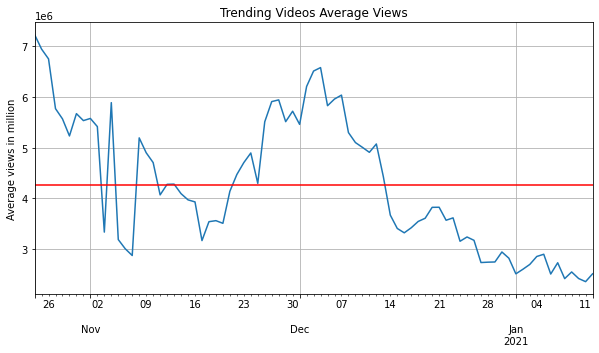

In [32]:
ts.plot(x='date', y='average views', figsize=(10,5), ylabel='Average views in million', xlabel='', title='Trending Videos Average Views', legend=False, grid=True)
mean = ts['average views'].mean()
print('Average of average of all trending videos views on that day ', mean)
plt.axhline(mean, color='r')

Average of difference of average of all trending videos views on that day  -59020.06048652375


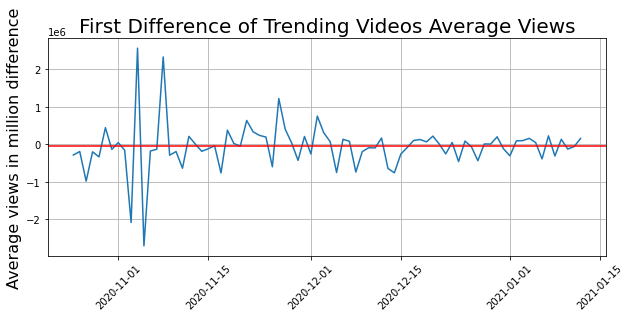

In [33]:
first_diff = average_views.diff()[1:]

plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('First Difference of Trending Videos Average Views', fontsize=20)
plt.ylabel('Average views in million difference', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True)
mean = first_diff.mean()
print('Average of difference of average of all trending videos views on that day ', mean)
plt.axhline(mean, color='r')

### **ARMA Method**

Split data into train and test in ratio of 80:20


In [34]:
train, test = train_test_split(first_diff, test_size=0.2, shuffle=False)

Find the best past value using information criteria

In [ ]:
from statsmodels.tsa.stattools import arma_order_select_ic
res = arma_order_select_ic(train, ic=["aic", "bic"], trend="nc")

In [36]:
print(res.aic_min_order)
print(res.bic_min_order)

(1, 0)
(1, 0)


In [ ]:
from statsmodels.tsa.arima_model import ARMA
model = ARMA(train, order=(1, 0))

start = time()
model_fit = model.fit()
end = time()

In [38]:
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.013201236724853516


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          average views   No. Observations:                   55
Model:                     ARMA(1, 0)   Log Likelihood                -818.903
Method:                       css-mle   S.D. of innovations         707054.911
Date:                Sat, 02 Jan 2021   AIC                           1643.806
Time:                        18:04:48   BIC                           1649.828
Sample:                    10-25-2020   HQIC                          1646.135
                         - 12-18-2020                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -6.705e+04   6.99e+04     -0.959      0.342   -2.04e+05       7e+04
ar.L1.average views    -0.3706      0.124     -2.998      0.004      -0.613      -0.128
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.6981           +0.0000j            2.6981            0.5000
-----------------------------------------------------------------------------
"""

![7d9857df35a2be67a8a039b1444bffec.png](http://latex2png.com/pngs/23d91e6f531655eabc021666cdd4b4b6.png)

LaTeX: \overset{\wedge}y_{t} = -6.7\textrm{y}_{t-1} - 0.37\varepsilon_{t-1}

In [39]:
pred_start_date = test.index[0]
pred_end_date = test.index[-1]
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test - predictions

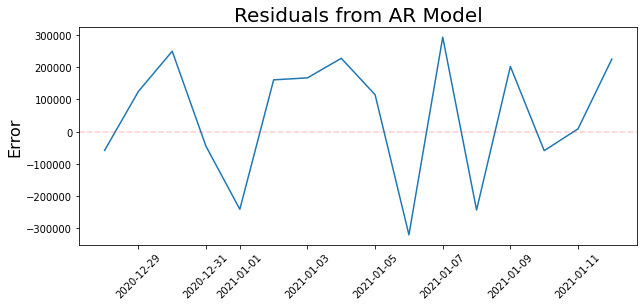

In [40]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.xticks(rotation=45)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

(array([737741., 737742., 737743., 737744., 737745., 737746., 737747.,
        737748., 737749., 737750.]),
 <a list of 10 Text major ticklabel objects>)

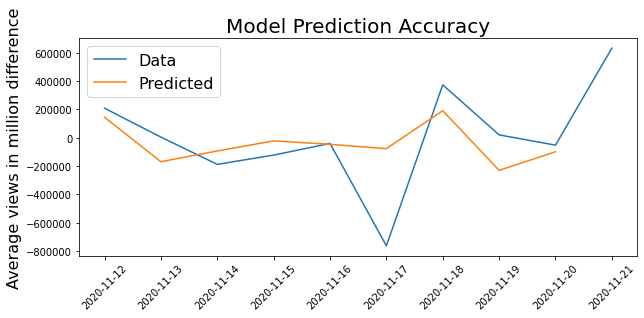

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(test)
plt.plot(predictions)
plt.legend(('Data', 'Predicted'), fontsize=16)
plt.title('Model Prediction Accuracy', fontsize=20)
plt.ylabel('Average views in million difference', fontsize=16)
plt.xticks(rotation=45)

In [ ]:
print('Root Mean Squared Error: ', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 2210.267116397745


## **Predicting Views**

Split data into train and test in ratio of 80:20

In [ ]:
X = df.drop(['view_count'], axis=1, inplace=False)
y = df['view_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7412, 3) (1854, 3) (7412,) (1854,)


Text(0.5, 1.0, 'Data shape')

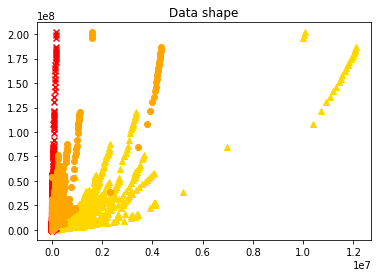

In [ ]:
plt.scatter(X['likes'], y, c='gold', marker='^')
plt.scatter(X['dislikes'], y, c='r', marker='x')
plt.scatter(X['comment_count'], y, c='orange')
plt.title("Data shape")
# plt.set_xlabel('amount')
# plt.set_ylabel('view count')

### **Method \#1 - Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# predicting the  test set results
y_pred = model.predict(X_test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(X_test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 4147345.996405274
Variance score: 0.87
Result : 0.8690380320888537
      True Labels  Predicted Labels
8291      2119975      1.742886e+06
5375      8009420      1.112465e+07
7004       651001      1.184195e+06
4474      1087187      2.805117e+06
1473        61479      6.798961e+05
...           ...               ...
8413      3368105      2.261291e+06
1579      1257650      4.543093e+06
4204       910404      1.090298e+06
6614      1683916      1.693508e+06
6129       182783      8.633809e+05

[1854 rows x 2 columns]


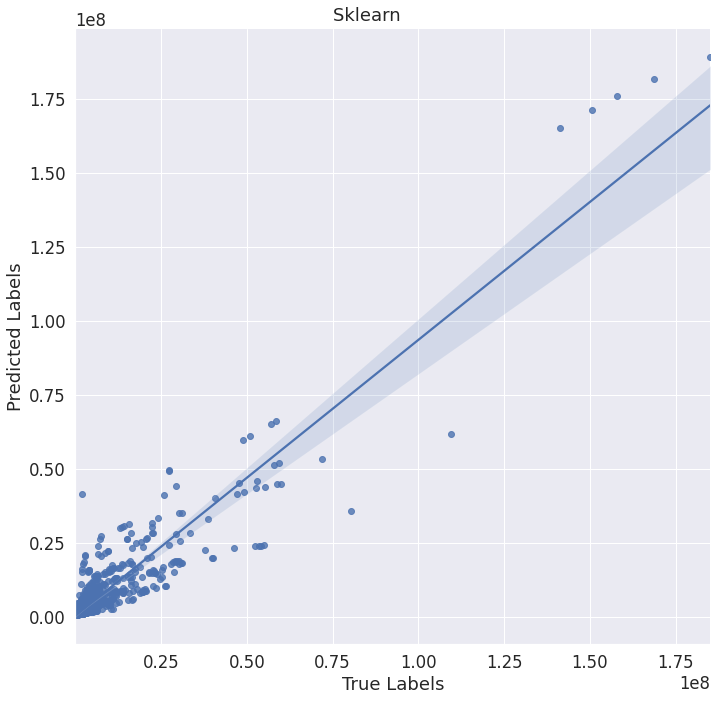

In [ ]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, height = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

### **Method \#2 - Random Forest**

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  5.1min finished


Best HyperParameter:  {'max_depth': 20, 'n_estimators': 160}
0.9757169896671757


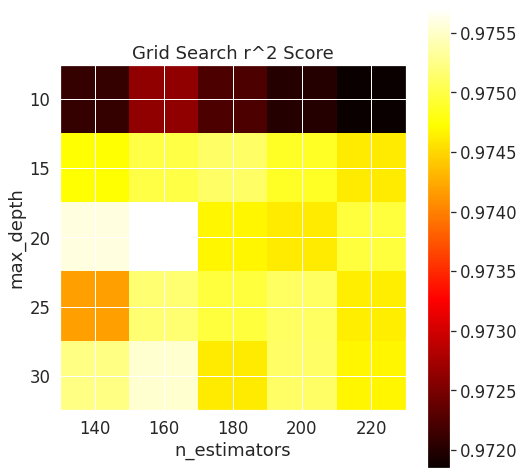

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

nEstimator = [140,160,180,200,220]
depth = [10,15,20,25,30]

RF = RandomForestRegressor()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
gsv.fit(X_train, y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))

plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(nEstimator)), nEstimator)
plt.yticks(np.arange(len(depth)), depth)
plt.title('Grid Search r^2 Score')
plt.show()
maxDepth=gsv.best_params_['max_depth']
nEstimators=gsv.best_params_['n_estimators']

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = nEstimators,max_depth=maxDepth)
model.fit(X_train, y_train)

# predicting the  test set results
y_pred = model.predict(X_test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(X_test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 1390619.930310603
Variance score: 0.99
Result : 0.9852761442313617
      True Labels  Predicted Labels
8291      2119975      2.242481e+06
5375      8009420      9.864274e+06
7004       651001      1.523480e+06
4474      1087187      1.221510e+06
1473        61479      9.898240e+04
...           ...               ...
8413      3368105      3.262936e+06
1579      1257650      5.802258e+06
4204       910404      7.994868e+05
6614      1683916      2.318077e+06
6129       182783      2.945435e+05

[1854 rows x 2 columns]


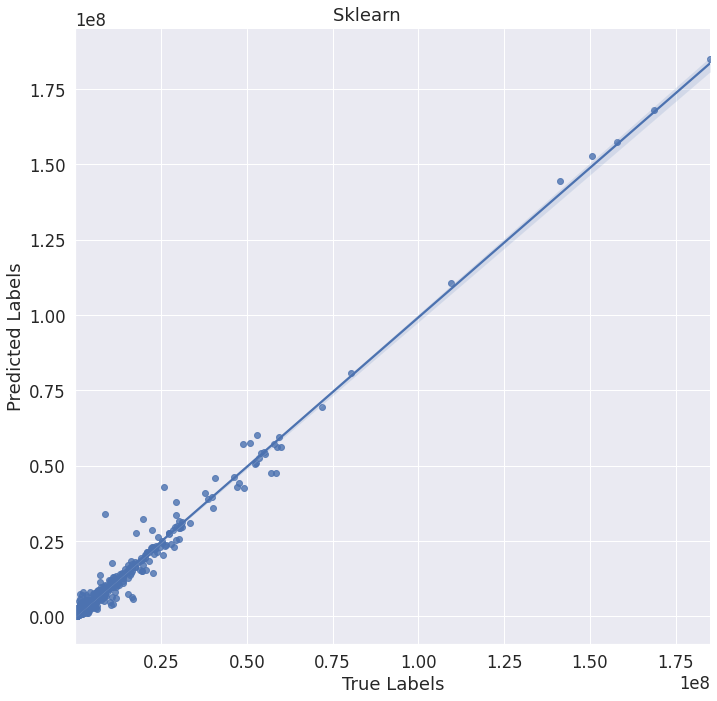

In [ ]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, height = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

## **Predicting Likes**

Split data into train and test in ratio of 80:20

In [ ]:
X = df.drop(['likes'], axis=1, inplace=False)
y = df['likes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4375, 3) (1094, 3) (4375,) (1094,)


### **Method \#1 - Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# predicting the  test set results
y_pred = model.predict(X_test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(X_test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 90523.67621072846
Variance score: 0.53
Result : 0.533844856678737
      True Labels  Predicted Labels
8966        52520     103653.368845
3320         4728     -10808.485743
1027         2601      -3048.754916
3321         1482     -17842.365596
3819         1205     -15357.611357
...           ...               ...
5563        23215     -11592.370195
7627            4     -24319.769430
8863         5851     -11873.874909
7379        71686     159900.030430
6771         6433     -18203.680311

[1854 rows x 2 columns]


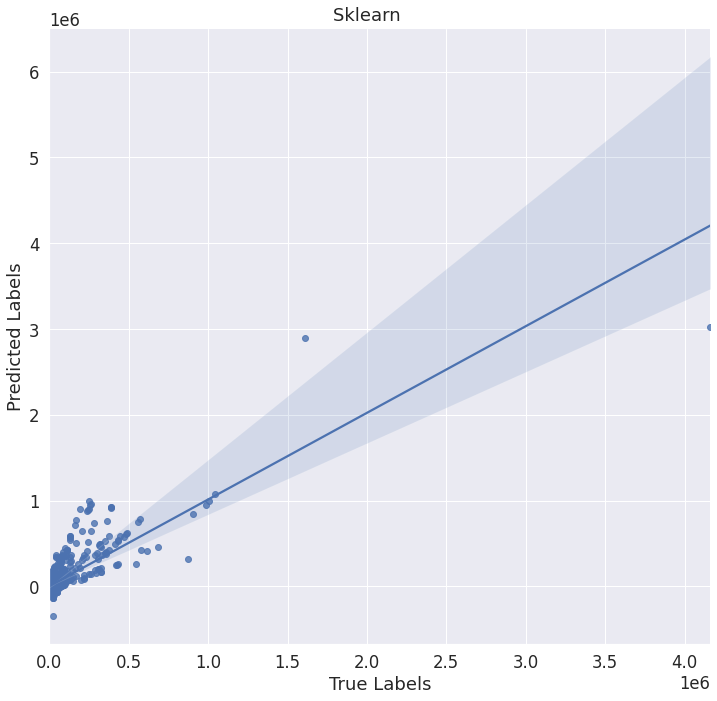

In [ ]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, height = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

### **Method \#2 - Random Forest**

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  5.4min finished


Best HyperParameter:  {'max_depth': 20, 'n_estimators': 160}
0.9600281442890093


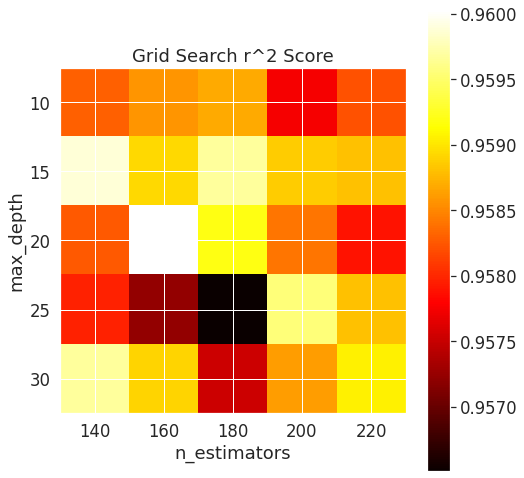

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

nEstimator = [140,160,180,200,220]
depth = [10,15,20,25,30]

RF = RandomForestRegressor()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
gsv.fit(X_train, y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))

plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(nEstimator)), nEstimator)
plt.yticks(np.arange(len(depth)), depth)
plt.title('Grid Search r^2 Score')
plt.show()
maxDepth=gsv.best_params_['max_depth']
nEstimators=gsv.best_params_['n_estimators']

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = nEstimators,max_depth=maxDepth)
model.fit(X_train, y_train)

# predicting the  test set results
y_pred = model.predict(X_test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(X_test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 24167.553106506934
Variance score: 0.97
Result : 0.9667745035775177
      True Labels  Predicted Labels
8966        52520      42548.305893
3320         4728       5503.755949
1027         2601       5200.917860
3321         1482       2715.583327
3819         1205       1513.027616
...           ...               ...
5563        23215      23179.492800
7627            4        468.766951
8863         5851       9922.060509
7379        71686      71617.952371
6771         6433       4025.245245

[1854 rows x 2 columns]


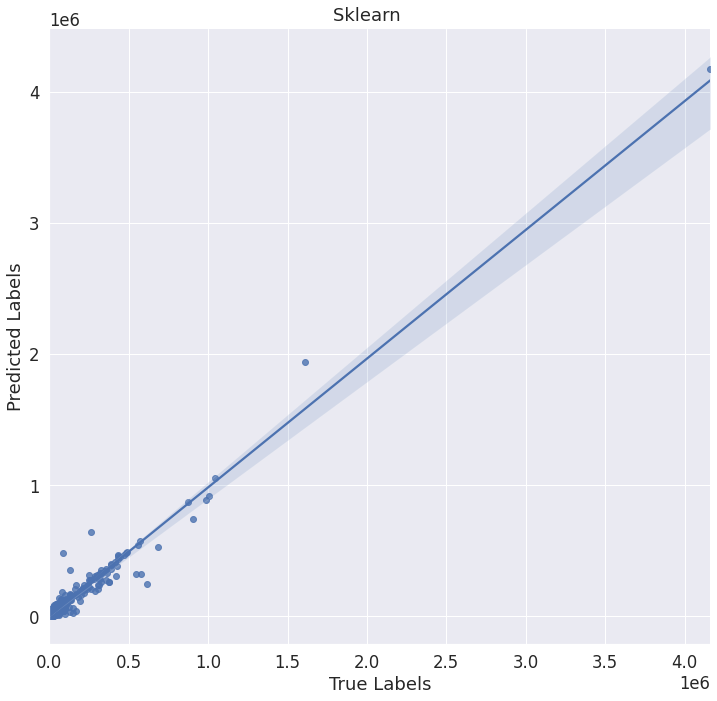

In [ ]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, height = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

## **Predicting Comments**

Split data into train and test in ratio of 80:20

In [ ]:
X = df.drop(['comment_count'], axis=1, inplace=False)
y = df['comment_count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7412, 3) (1854, 3) (7412,) (1854,)


### **Method \#1 - Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# predicting the  test set results
y_pred = model.predict(X_test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(X_test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 90523.67621072846
Variance score: 0.53
Result : 0.533844856678737
      True Labels  Predicted Labels
8966        52520     103653.368845
3320         4728     -10808.485743
1027         2601      -3048.754916
3321         1482     -17842.365596
3819         1205     -15357.611357
...           ...               ...
5563        23215     -11592.370195
7627            4     -24319.769430
8863         5851     -11873.874909
7379        71686     159900.030430
6771         6433     -18203.680311

[1854 rows x 2 columns]


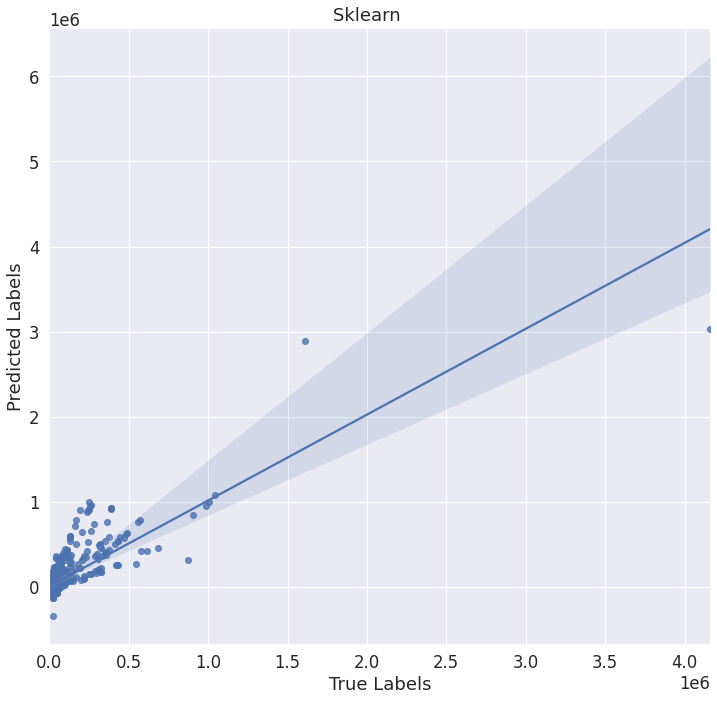

In [ ]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, height = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

### **Method \#2 - Random Forest**

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  5.4min finished


Best HyperParameter:  {'max_depth': 15, 'n_estimators': 140}
0.960842589197674


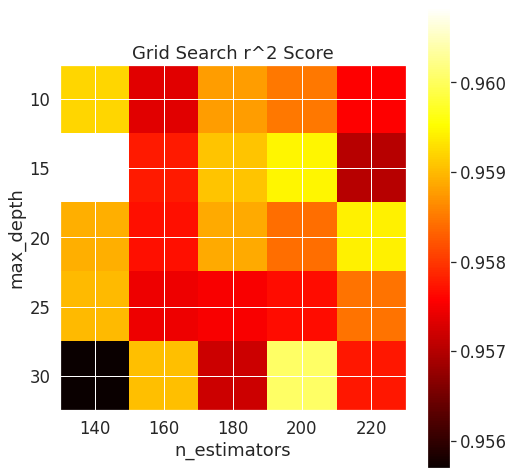

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

nEstimator = [140,160,180,200,220]
depth = [10,15,20,25,30]

RF = RandomForestRegressor()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]
gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
gsv.fit(X_train, y_train)
print("Best HyperParameter: ",gsv.best_params_)
print(gsv.best_score_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))

plt.figure(figsize=(8, 8))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.colorbar()
plt.xticks(np.arange(len(nEstimator)), nEstimator)
plt.yticks(np.arange(len(depth)), depth)
plt.title('Grid Search r^2 Score')
plt.show()
maxDepth=gsv.best_params_['max_depth']
nEstimators=gsv.best_params_['n_estimators']

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = nEstimators,max_depth=maxDepth)
model.fit(X_train, y_train)

# predicting the  test set results
y_pred = model.predict(X_test)
print('Root means score', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("Result :",model.score(X_test, y_test))
d1 = {'True Labels': y_test, 'Predicted Labels': y_pred}
SK = pd.DataFrame(data = d1)
print(SK)

Root means score 23963.833878479636
Variance score: 0.97
Result : 0.9673322881701516
      True Labels  Predicted Labels
8966        52520      39103.420432
3320         4728       5510.696185
1027         2601       4264.523394
3321         1482       2873.213517
3819         1205       1652.612836
...           ...               ...
5563        23215      21884.427562
7627            4        544.470204
8863         5851       7840.706612
7379        71686      69850.523731
6771         6433       4840.508740

[1854 rows x 2 columns]


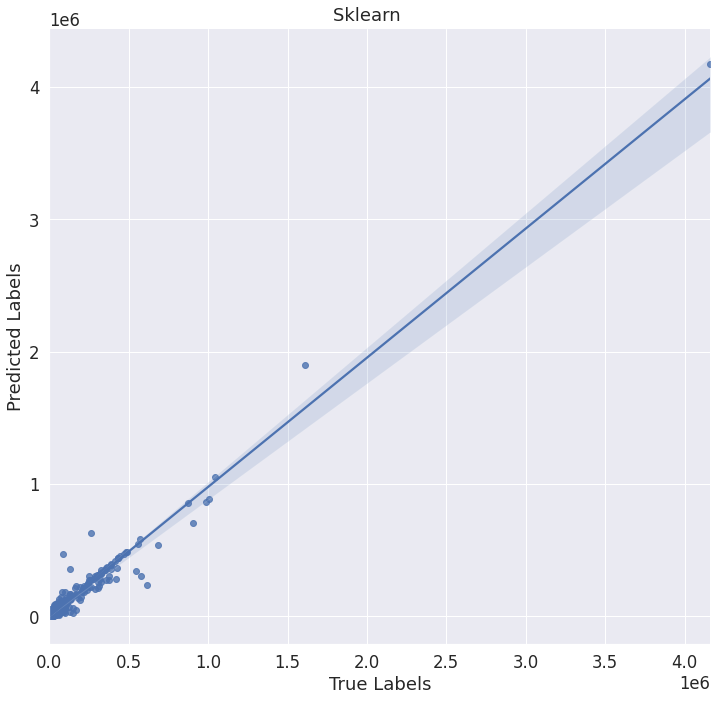

In [ ]:
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = SK, height = 10)
fig1 = lm1.fig 
fig1.suptitle("Sklearn ", fontsize=18)
sns.set(font_scale = 1.5)

##**Predict Views by Title (Failed Attempt)**

In [ ]:
# https://github.com/har07/PySastrawi
!pip install PySastrawi

     |████████████████████████████████| 215kB 9.6MB/s 


In [ ]:
# import StemmerFactory class
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

dictionary = []

X = df['title']
newX = np.array([])
isNull = []
for i in range(len(X)):
  title = X[i]
  newTitle = np.array([])
  for word in stemmer.stem(title).split():
    if word not in dictionary:
      dictionary.append(word)
    newTitle = np.append(newTitle, dictionary.index(word))
  if len(newTitle) == 0:
    isNull.append(i)
  else:
    np.vstack([newX, newTitle])

y = df['view_count'].values
newY = np.array([])
for i in range(len(y)):
  if i not in isNull:
    np.vstack([newY, np.array(y[i])])

X_train, X_test, y_train, y_test = train_test_split(newX, newY, test_size=0.2)

In [ ]:
newX

array([], dtype=float64)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print(model.predict(X_test))

Failed

# **Dataset Analysis**

In [20]:
df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10921 entries, 0 to 10920
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   video_id           10921 non-null  object
 1   title              10921 non-null  object
 2   publishedAt        10921 non-null  object
 3   channelId          10921 non-null  object
 4   channelTitle       10921 non-null  object
 5   categoryId         10921 non-null  int64 
 6   trending_date      10921 non-null  object
 7   tags               10921 non-null  object
 8   view_count         10921 non-null  int64 
 9   likes              10921 non-null  int64 
 10  dislikes           10921 non-null  int64 
 11  comment_count      10921 non-null  int64 
 12  thumbnail_link     10921 non-null  object
 13  comments_disabled  10921 non-null  bool  
 14  ratings_disabled   10921 non-null  bool  
 15  description        10792 non-null  object
dtypes: bool(2), int64(5), object(9)
memory u

In [21]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,10921.000000,1.092100e+04,1.092100e+04,10921.000000,1.092100e+04
mean,19.188170,4.190689e+06,2.121415e+05,5006.108964,3.332163e+04
std,6.769074,1.095890e+07,6.924748e+05,12381.813855,2.006231e+05
min,1.000000,2.141800e+04,0.000000e+00,0.000000,0.000000e+00
25%,10.000000,7.368450e+05,1.436100e+04,495.000000,1.892000e+03
50%,24.000000,1.588083e+06,4.257800e+04,1232.000000,5.149000e+03
75%,24.000000,3.500920e+06,1.353580e+05,3552.000000,1.420700e+04
max,29.000000,2.018528e+08,1.210841e+07,180664.000000,4.357568e+06


## **Correlation Matrix**

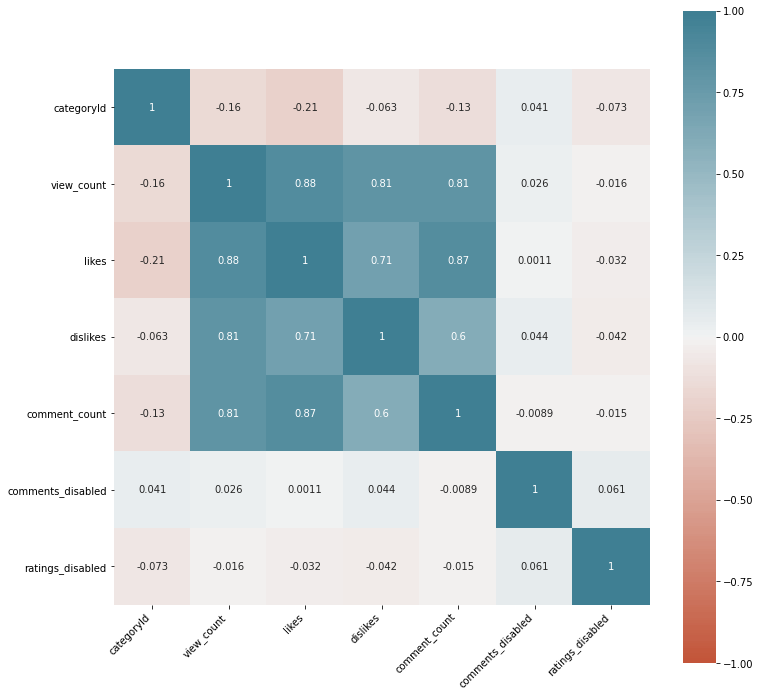

In [22]:
data = df

corr = data.corr()
plt.figure(figsize=(12, 12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## **Trending video upload time analysis**

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

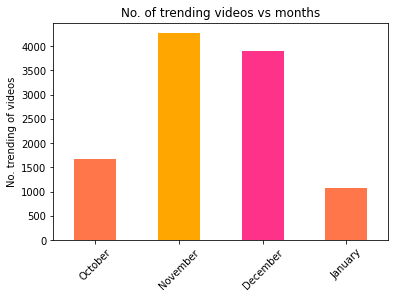

In [23]:
cdf = df["trending_date"].apply(lambda x: x[6:]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "month", "trending_date": "No_of_videos"})
cdf = cdf.reindex([2, 0, 1, 3])

cdf.plot.bar(x="month", y="No_of_videos", title="No. of trending videos vs months", color=sns.color_palette(['#ff764a', '#ffa600', '#ff328a'], n_colors=7), xlabel="", ylabel="No. trending of videos", legend=False).set_xticklabels(['October', 'November', 'December', 'January'])
plt.xticks(rotation=45)

In [24]:
publish_time = pd.to_datetime(df['publishedAt'], format='%Y-%m-%dT%H:%M:%SZ')
df['publish_time'] = publish_time.dt.time
df['publish_date'] = publish_time.dt.date
df['publish_weekday'] = publish_time.dt.day_name()
# df['publish_weekday'] = df['publish_weekday'].replace({'Monday':1,
#                                                              'Tuesday':2,
#                                                              'Wednesday':3,
#                                                              'Thursday':4,
#                                                              'Friday':5,
#                                                              'Saturday':6,
#                                                              'Sunday':7})

Monday       1678
Tuesday      1345
Wednesday    1563
Thursday     1489
Friday       1665
Saturday     1756
Sunday       1425
Name: publish_weekday, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


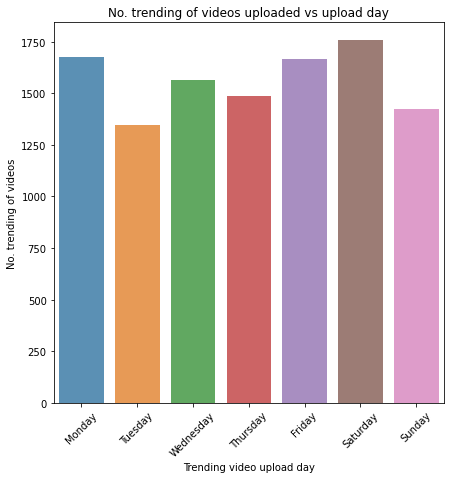

In [25]:
count=df["publish_weekday"].value_counts()
count = count.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
print(count)
plt.figure(figsize=(7,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('No. trending of videos uploaded vs upload day')
plt.ylabel('No. trending of videos')
plt.xlabel('Trending video upload day')
plt.xticks(rotation=45)
plt.show()

## **Trending video analysis**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


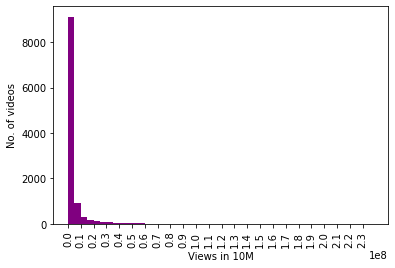

In [26]:
fig, ax = plt.subplots()
_ = sns.distplot(df["view_count"], kde=False, color='purple', 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views in 10M", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

From the histogram above we can see that most of the trending videos are less than 10M. 

Now let us plot the histogram just for videos with 25 million views or less to get a closer look at the distribution of the data

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


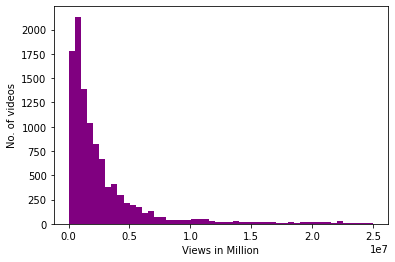

In [27]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["view_count"] < 25e6]["view_count"], kde=False, 
                 color='purple', hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views in Million", ylabel="No. of videos")

Now we see that the majority of trending videos have 2 million views or less. Let's see the exact percentage of videos less than 2 million views

In [ ]:
df[df['view_count'] < 2e6]['view_count'].count() / df['view_count'].count() * 100

56.36130958728805

Around 56.4% of the videos have less than 2M views. Similarly, we can see that the percentage of videos with less than 3.5 million views is around 67%, and that the percentage of videos with less than 7 million views is around 87%.

False    9360
True       17
Name: comments_disabled, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


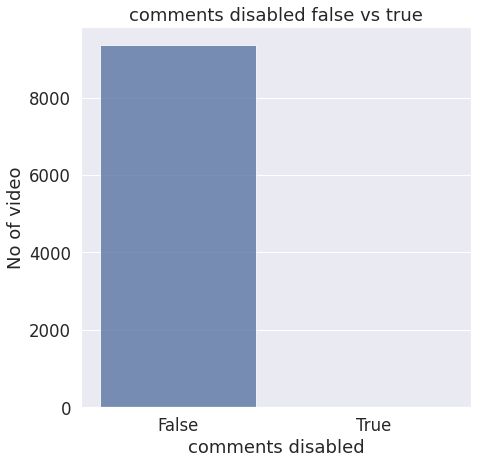

In [ ]:
count=df['comments_disabled'].value_counts()
print(count)
plt.figure(figsize=(7,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('comments disabled false vs true')
plt.ylabel('No of video')
plt.xlabel('comments disabled')
plt.show()

False    9266
True      111
Name: ratings_disabled, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


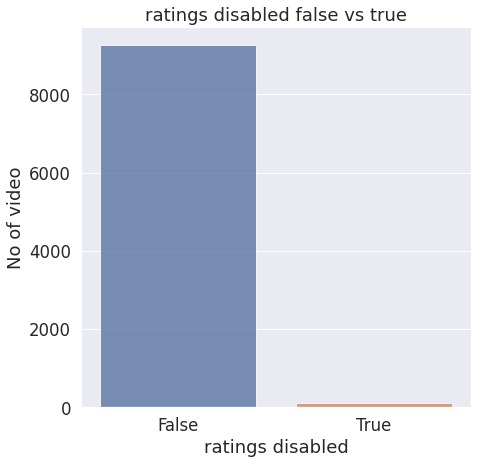

In [ ]:
count=df['ratings_disabled'].value_counts()
print(count)
plt.figure(figsize=(7,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('ratings disabled false vs true')
plt.ylabel('No of video')
plt.xlabel('ratings disabled')
plt.show()

24    3858
10    2676
25    1332
17     997
22     731
23     339
20     196
26     189
1      167
2      159
27      91
19      76
28      56
29      34
15      20
Name: categoryId, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


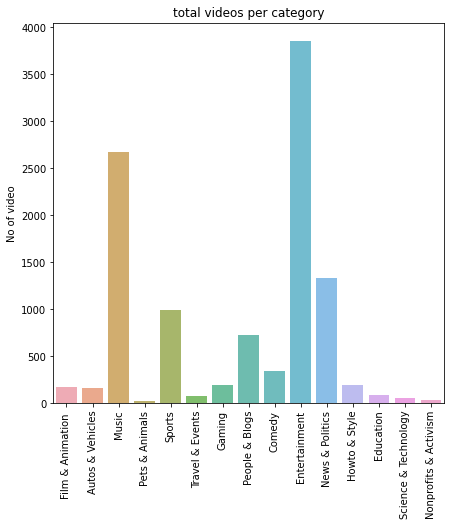

In [19]:
count=df['categoryId'].value_counts()
print(count)
fig, ax = plt.subplots(figsize=(7,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.title('total videos per category')
ax.set_xticklabels(['Film & Animation ','Autos & Vehicles','Music','Pets & Animals','Sports','Travel & Events','Gaming','People & Blogs','Comedy','Entertainment','News & Politics','Howto & Style','Education','Science & Technology','Nonprofits & Activism'])
plt.ylabel('No of video')
plt.xticks(rotation=90)
plt.show()